In [1]:
import json
import requests
import pandas as pd
from config import api_key
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Zillow Data URL
URL_Data_Csv = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA.json?qopts.export=true&api_key={api_key}")

# API Call
data_csv = requests.get(URL_Data_Csv).json()

In [3]:
# Retrieve csv download link
data_link = data_csv['datatable_bulk_download']['file']['link']
data_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/DATA/ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.zip?X-Amz-Expires=1800&X-Amz-Date=20231006T005555Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEGEaCXVzLWVhc3QtMSJGMEQCIERD%2BIY3lLVwqRx6/prrMpLiZC3o3ko4AXxdIWqriLb4AiA1uNzwRNnF2rlvEPGu0kVJDJ69o9jkXet8Tajtw7/BCSq0BQhpEAIaDDMwNjMyMDUwMDIwNCIMD9arM4t2hOVdeEVXKpEFc%2BgKs0RfHS8I4XUjbWou5OF4YpzX4CpI/bwwusDVVbTUu8Z7aq4IWlaOvuFzGrKwsoQOB%2BNM79Ig3sKFAabuQ1hBpmslGI7I%2BAZbFm0eE4n%2BvDTDfzNzSv8EWOq5dcSWuaZOy06xARiUm2VR3zCTzhxSiqf4D0KdjTqpfjYgG57iB3KurCUfstfeLu3t6OSCbtsK/NrP/ml9lcV4oRAl6OPWa8J9wDgVIJjX9bxFEX0IhGSQ5jzzVwdoKDMiERHNW/1tUshmsrO7J6wK2HOCCN6NbQW7tDkWTVYVqAUQYQTvAI8lKX71%2BR0XE/qkAuE4Qs7SAlO0Mpy/NVxabAq2sN/hu4ybMcV4ukmF/02KjH2pGxbwXqmxhCohiD1eLSvIHwedSYFORo4%2BcHConvY7FxAp6d0VXK%2Byd0MOL71HGsAXzr/dOjXmwBQL7UNB59doH7n2yY/6yup83Ra6LaNl3YNGNSGaoD2xvOq6HRiuDSGF8mmuEXvVC3Hgf/Oir48SNO0ArPvRalByIl2ebWtGZSrUV9WwWSF/RfS%2BVsFhXnRmD%2B6bKVlXZ9RK2Le1Lzb6bBqAR1lRSDDp2B02frUwsitpuiRVXHeUGu1K

In [4]:
# CSV File Paths
path_data = Path("Resources", "Zillow_Data.csv")

# Create DataFrames for the CSV Files
data_df = pd.read_csv(path_data)
data_df

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.000000
1,ZATT,3101,1998-02-28,342993.000000
2,ZATT,3101,1998-03-31,346763.000000
3,ZATT,3101,1998-04-30,349356.000000
4,ZATT,3101,1998-05-31,351981.000000
...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088
150217957,Z4BR,51236,2023-08-31,197282.405592
150217958,Z4BR,22166,2023-08-31,321075.347722
150217959,Z4BR,54589,2023-08-31,144402.793079


In [5]:
# Zillow Indicators URL
URL_Indicators = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key={api_key}")

# API Call
response_ind = requests.get(URL_Indicators).json()

# Create Indicators DataFrame
indicators_df = pd.DataFrame(response_ind['datatable']['data'])

# Rename columns
indicators_df = indicators_df.rename(columns = {0: 'indicator_id', 
                          1: 'indicator', 
                          2: 'category',
                                               })

indicators_df.head()

,indicator_id,indicator,category
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [6]:
# Zillow Regions URL
URL_Regions = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS.json?qopts.export=true&api_key={api_key}")

# API Call
regions_csv = requests.get(URL_Regions).json()

In [7]:
# Retrieve csv download link
regions_link = regions_csv['datatable_bulk_download']['file']['link']
regions_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/REGIONS/ZILLOW_REGIONS_1a51d107db038a83ac171d604cb48d5b.zip?X-Amz-Expires=1800&X-Amz-Date=20231006T005653Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEGEaCXVzLWVhc3QtMSJIMEYCIQCjTotoy%2B11MZO3l19KyKn44KS2dCKWFRrnWTgjJxO%2BJAIhAPD%2B1QB7v4fAY5iAxn1Jz%2BG9%2Bld9WQR4iIUtUV4dt6SBKrMFCGoQAhoMMzA2MzIwNTAwMjA0IgyFcnayBkDRDlTDZWwqkAVDKLo22fG1wQ0%2BVd783M5joXBe3%2BGOj5wLg4erjxMvDEHrwBL7SeJM6arjTINkwdkQj64sijXH2tPW62Z7ulKHmYcumUzYoKB5cssQmnl9YCwwnYw2Jy1uhSSsjSPQszIxdLh05qqiWfAyEB5hYQ0PJ/oZ9zUVfYGOWnfgWe16J8mZg6OT3itgJeXggEtrvYoGFy15O6csSwFMKP7EontIkBxj6rruEKxWQutVqlxD480y15y4xLrFnHq5hltJPiXg5oHv7bVlPsPq7TlBmklaF3iVZBKR7e5VuUVIBXBGawyYeS8z1Ebii2SDqHmQA7JWWrldlrpEQV4vo2rLIJea2WT6Lx0e6sGoFbsgvSe0WJ3hVa0K6ue5tn6IHkwjFFF9P1LLuII88mnf9Vk7OCj/Ly7tz7L9fLGammN8jEjOoj12VuOCxr9j8xg6cu8nPewgvzs7RJW8xVP2/Vv8WbQ5Zz%2B8EGtrWHJLlEOov7tREtpTNA0%2BdZO6zC4JH6kQsJopniLVEIkxycaEsx4FtqQkftmDTCcx3UvsooqdgGR9t8FAtMJcKDLkuxD6X6vTPPLDokIGhyqk7tFR9QwW1Avg9eIV1yh7

In [9]:
# CSV File Paths
path_regions = Path("Resources", "Zillow_Regions.csv")

# Create DataFrames for the CSV Files
regions_df = pd.read_csv(path_regions)
regions_df

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,196538,neigh,Murray Hill; NY; New York-Newark-Jersey City; ...
...,...,...,...
89300,87837,zip,"68058;NE;Omaha-Council Bluffs, NE-IA;South Ben..."
89301,61652,zip,"10038;NY;New York-Newark-Jersey City, NY-NJ-PA..."
89302,79935,zip,49777;MI;nan;Presque Isle;Presque Isle County
89303,62010,zip,"11109;NY;New York-Newark-Jersey City, NY-NJ-PA..."


In [10]:
# Merge the Data and Indicator DataFrames
df_12 = pd.merge(data_df, indicators_df, on = 'indicator_id', how = 'left')
df_12

,indicator_id,region_id,date,value,indicator,category
0,ZATT,3101,1998-01-31,338849.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,1998-02-28,342993.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,1998-03-31,346763.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,1998-04-30,349356.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,1998-05-31,351981.000000,ZHVI All Homes- Top Tier Time Series ($),Home values
...,...,...,...,...,...,...
150217956,Z4BR,27874,2023-08-31,163372.164088,ZHVI 4-Bedroom Time Series ($),Home values
150217957,Z4BR,51236,2023-08-31,197282.405592,ZHVI 4-Bedroom Time Series ($),Home values
150217958,Z4BR,22166,2023-08-31,321075.347722,ZHVI 4-Bedroom Time Series ($),Home values
150217959,Z4BR,54589,2023-08-31,144402.793079,ZHVI 4-Bedroom Time Series ($),Home values


In [11]:
# Merge all DataFrames
merged_df = pd.merge(df_12, regions_df, on = 'region_id') 
merged_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZATT,3101,1998-01-31,338849.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
1,ZATT,3101,1998-02-28,342993.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
2,ZATT,3101,1998-03-31,346763.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
3,ZATT,3101,1998-04-30,349356.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
4,ZATT,3101,1998-05-31,351981.0,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
...,...,...,...,...,...,...,...,...
150217956,Z3BR,65461,2020-02-29,129328.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217957,Z3BR,65461,2020-03-31,128308.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217958,Z3BR,65461,2020-04-30,126284.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...
150217959,Z3BR,65461,2020-05-31,124288.0,ZHVI 3-Bedroom Time Series ($),Home values,zip,18416; PA; Scranton--Wilkes-Barre--Hazleton; L...


In [12]:
# Isolating for State rows only
bystate_df = merged_df[merged_df['region_type'] == 'state']
bystate_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
2706868,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
2706869,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2706870,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706871,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
2706872,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
73310371,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
73310372,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
73310373,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
73310374,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [13]:
# Save DF to CSV
bystate_df.to_csv('Resources/bystate.csv', index=False)

In [14]:
# Call in csv
path_cleaning = Path("Resources", "bystate.csv")

cleaning_df = pd.read_csv(path_cleaning)
cleaning_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
1,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
3,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
4,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
166796,ZALL,35,2023-03-31,438471.171251,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values,state,Montana
166797,ZCON,35,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Home values,state,Montana
166798,ZABT,35,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Home values,state,Montana
166799,Z5BR,35,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Home values,state,Montana


In [15]:
# Remove these columns
cleaning_df = cleaning_df.drop(['region_id', 'category', 'region_type'], axis=1)

# Remove these rows
cleaning_df = cleaning_df[cleaning_df['indicator'] != 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)']
cleaning_df

,indicator_id,date,value,indicator,region
0,Z5BR,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut
1,Z4BR,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut
2,ZATT,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut
3,ZATT,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut
4,ZATT,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut
...,...,...,...,...,...
166795,Z4BR,2005-01-31,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana
166797,ZCON,2023-03-31,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana
166798,ZABT,2023-03-31,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana
166799,Z5BR,2023-03-31,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana


In [16]:
#show unique indicators
cleaning_df['indicator'].unique()

array(['ZHVI 5+ Bedroom Time Series ($)',
       'ZHVI 4-Bedroom Time Series ($)',
       'ZHVI All Homes- Top Tier Time Series ($)',
       'ZHVI 1-Bedroom Time Series ($)',
       'ZHVI Condo/Co-op Time Series ($)',
       'ZHVI 2-Bedroom Time Series ($)',
       'ZHVI Single-Family Homes Time Series ($)',
       'ZHVI All Homes- Bottom Tier Time Series ($)',
       'ZHVI 3-Bedroom Time Series ($)'], dtype=object)

In [17]:
# switch date column to date time type
cleaning_df['date'] = pd.to_datetime(cleaning_df['date'])

# add year column
cleaning_df['year'] = cleaning_df['date'].dt.year

# drop original date column
cleaning_df = cleaning_df.drop(['date'], axis = 1)
cleaning_df

,indicator_id,value,indicator,region,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [18]:
# rename columns to more easily understood names
cleaning_df = cleaning_df.rename(columns = {'value': 'price', 'region': 'state', 'indicator': 'property type'})
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881.000000,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889.929517,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530.650286,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670.946721,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [19]:
# switch price column to integer
cleaning_df['price'] = cleaning_df['price'].astype('int64')
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,428889,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,262530,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,606670,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [26]:
#add dollar variable

#add_dollar = lambda x: f'${x}'

# add $ to price column
#cleaning_df['price'] = cleaning_df['price'].apply(add_dollar)
#cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,$652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,$385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,$338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,$349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,$352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,$198881,ZHVI 4-Bedroom Time Series ($),Montana,2005
166797,ZCON,$428889,ZHVI Condo/Co-op Time Series ($),Montana,2023
166798,ZABT,$262530,ZHVI All Homes- Bottom Tier Time Series ($),Montana,2023
166799,Z5BR,$606670,ZHVI 5+ Bedroom Time Series ($),Montana,2023


In [20]:
# rename property type values to more easily understood names
cleaning_df['property type'] = cleaning_df['property type'].replace({'ZHVI 5+ Bedroom Time Series ($)': '5+ bedroom homes',
                                                            'ZHVI 4-Bedroom Time Series ($)': '4 bedroom homes',
                                                            'ZHVI Single-Family Homes Time Series ($)': 'single-family homes',
                                                            'ZHVI All Homes- Bottom Tier Time Series ($)': 'All home type - bottom tier',
                                                            'ZHVI 3-Bedroom Time Series ($)': '3 bedroom homes',
                                                            'ZHVI 2-Bedroom Time Series ($)': '2 bedroom homes',
                                                            'ZHVI All Homes- Top Tier Time Series ($)': 'All home types - top tier',
                                                            'ZHVI Condo/Co-op Time Series ($)': 'condos',
                                                            'ZHVI 1-Bedroom Time Series ($)': '1 bedroom homes'})
cleaning_df                               

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
166795,Z4BR,198881,4 bedroom homes,Montana,2005
166797,ZCON,428889,condos,Montana,2023
166798,ZABT,262530,All home type - bottom tier,Montana,2023
166799,Z5BR,606670,5+ bedroom homes,Montana,2023


In [21]:
# Reset index
cleaning_df = cleaning_df.reset_index(drop=True)
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
150087,Z4BR,198881,4 bedroom homes,Montana,2005
150088,ZCON,428889,condos,Montana,2023
150089,ZABT,262530,All home type - bottom tier,Montana,2023
150090,Z5BR,606670,5+ bedroom homes,Montana,2023


In [22]:
reduced_df = cleaning_df[cleaning_df['year'] >= 2012]
reduced_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
5,Z1BR,107599,1 bedroom homes,Connecticut,2015
6,ZCON,164682,condos,Connecticut,2020
7,Z2BR,189335,2 bedroom homes,Connecticut,2020
...,...,...,...,...,...
149655,Z4BR,530606,4 bedroom homes,Montana,2023
150088,ZCON,428889,condos,Montana,2023
150089,ZABT,262530,All home type - bottom tier,Montana,2023
150090,Z5BR,606670,5+ bedroom homes,Montana,2023


In [23]:
#condition = reduced_df['state'] == 'Montana'
#Montana_df = reduced_df[condition]
#Montana_df
reduced_df.dtypes

indicator_id     object
price             int64
property type    object
state            object
year              int64
dtype: object

Text(0, 0.5, 'All home type - bottom tier in Florida')

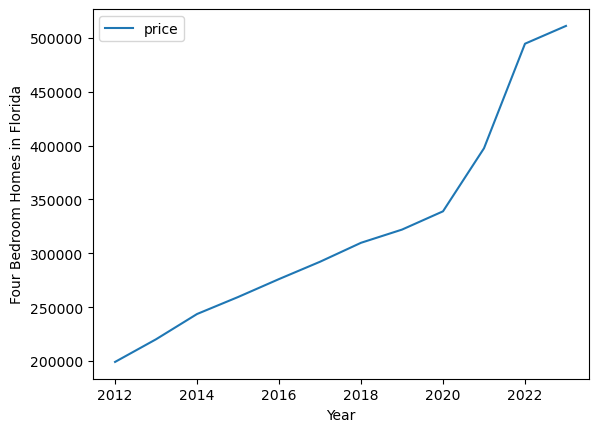

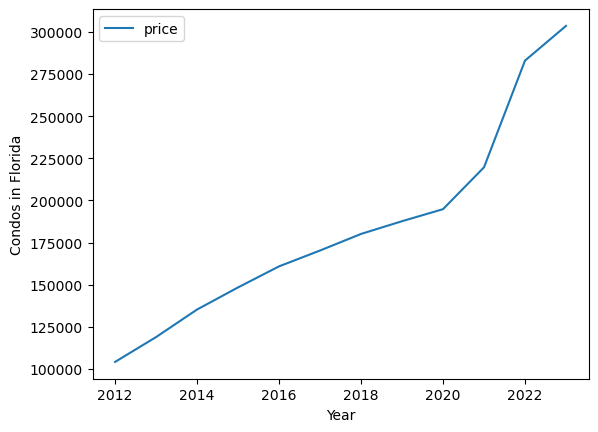

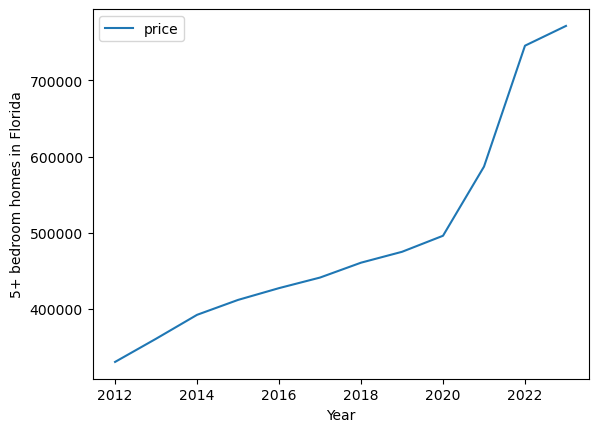

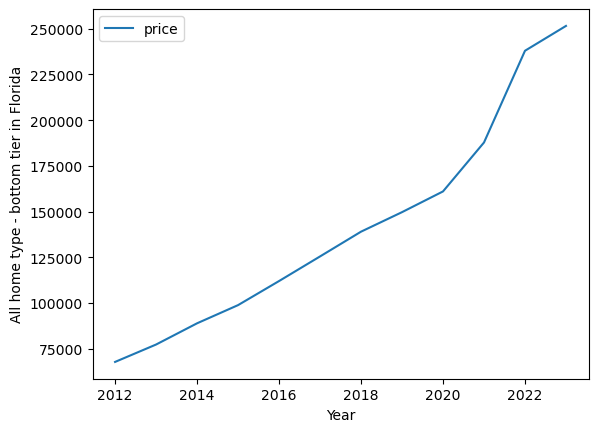

In [37]:
# # Testing florida 4 bedroom homes
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_1 = flor_df[flor_df['property type'] == '4 bedroom homes']
flor_plot1 = flor_1.groupby('year').mean(numeric_only=True)
flor_plot1.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Four Bedroom Homes in Florida')
# # Testing florida condos
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_2 = flor_df[flor_df['property type'] == 'condos']
flor_plot2 = flor_2.groupby('year').mean(numeric_only=True)
flor_plot2.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Condos in Florida')
# # Testing florida 5+ bedroom homes
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_3 = flor_df[flor_df['property type'] == '5+ bedroom homes']
flor_plot3 = flor_3.groupby('year').mean(numeric_only=True)
flor_plot3.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('5+ bedroom homes in Florida')
# # Testing florida All home type - bottom tier
flor_df = reduced_df[reduced_df['state'] == 'Florida']
flor_4 = flor_df[flor_df['property type'] == 'All home type - bottom tier']
flor_plot4 = flor_4.groupby('year').mean(numeric_only=True)
flor_plot4.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('All home type - bottom tier in Florida')

In [ ]:
# We can clearly see that over the course of ten years, real estate value has nearly tripled in the state of Florida.